In [1]:

import pandas
import numpy
import seaborn
import warnings
import gc
warnings.filterwarnings('ignore')
import os

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from pydrive2.auth import GoogleAuth
from google.colab import drive
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Importação de dados

In [2]:
#Connect to drive
def connect_to_drive():
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    return drive

#Concating multiples CSV files to a dataframe
def create_dataset_from_multiple_csv(path ="/content/drive/MyDrive/lab/CICIoT2023",extension =".csv"):

    %cd path

    DATASET_DIRECTORY = path
    df = pandas.DataFrame()

    for filename in os.listdir(DATASET_DIRECTORY):
        if filename.endswith(extension):
            try:
                current_df = pandas.read_csv(os.path.join(DATASET_DIRECTORY, filename))
                df = pandas.concat([df, current_df], ignore_index=True)
                df = df.astype({col: 'float32' for col in df.select_dtypes(include='float64')})
                del current_df
                del filename

            except OSError as e:
                if e.errno == 107:
                    print('falha ao conectar ',filename )
    #pandas.to_csv("CICIoT2023.txt",index=False)

    gc.collect()
    return df

#read csv data
def read_dataset(path= "/content/drive/MyDrive/lab/CICIoT2023",filename = "CICIoT2023.txt"):
  df = pandas.read_csv(path +"/"+filename,index_col=False)
  gc.collect()
  df = df.astype({col: 'float32' for col in df.select_dtypes(include='float64')})
  gc.collect()
  return df

#missing data analysis
def percentual_of_missing_data(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pandas.DataFrame({'percent_missing': percent_missing})
    return missing_value_df

#boxplot for numerical columns
def boxplot_for_nums(data, numeric_cols):
    col_counter = 0
    for col in numeric_cols:
        data[col].plot(kind='box')
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1

#historagram for numerical columns
def compute_histogram_bins(data, desired_bin_size):
    min_val = numpy.min(data)
    max_val = numpy.max(data)
    min_boundary = -1.0 * (min_val % desired_bin_size - min_val)
    max_boundary = max_val - max_val % desired_bin_size + desired_bin_size
    n_bins = int((max_boundary - min_boundary) / desired_bin_size) + 1
    bins = numpy.linspace(min_boundary, max_boundary, n_bins)
    return bins

def count_unique_data(df):
  unique_count_dict = {}
  for col in df.columns:
    unique_count_dict[col] = df[col].unique().size
  return unique_count_dict

def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        bins = compute_histogram_bins(data[col], 1.0)
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1

In [3]:
df = read_dataset()


### Exploratory Data Analysis (EDA)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
flow_duration,46686579.0,5.765450e+00,2.850342e+02,0.000000,0.000000e+00,0.000000e+00,1.051381e-01,3.943572e+05
Header_Length,46686579.0,7.670613e+04,4.613317e+05,0.000000,5.400000e+01,5.400000e+01,2.805550e+02,9.907148e+06
Protocol Type,46686579.0,9.065684e+00,8.945533e+00,0.000000,6.000000e+00,6.000000e+00,1.433000e+01,4.700000e+01
Duration,46686579.0,6.635076e+01,1.401919e+01,0.000000,6.400000e+01,6.400000e+01,6.400000e+01,2.550000e+02
Rate,46686579.0,9.064054e+03,9.956249e+04,0.000000,2.091856e+00,1.575423e+01,1.173848e+02,8.388608e+06
Srate,46686579.0,9.064054e+03,9.956249e+04,0.000000,2.091856e+00,1.575423e+01,1.173848e+02,8.388608e+06
Drate,46686579.0,5.463955e-06,7.250766e-03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.971523e+01
fin_flag_number,46686579.0,8.657207e-02,2.812070e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
syn_flag_number,46686579.0,2.073353e-01,4.053978e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
rst_flag_number,46686579.0,9.050472e-02,2.869035e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


Análise de dados perdidos

In [ ]:
missing_values_evaluation =  percentual_of_missing_data(df):

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
percent_missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Variáveis numéricas

In [ ]:
X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count',
       'syn_count', 'fin_count', 'urg_count', 'rst_count',
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
       'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
       'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
       'Radius', 'Covariance', 'Variance', 'Weight',
]
y_column = 'label'

In [ ]:
num_cols = [col for col in X_columns if df[col].dtypes != 'O']
print('Variáveis numéricas: ', len(num_cols))


Variáveis numéricas:  46


##Variáveis binárias

In [4]:
unique_count_dict = count_unique_data(df)
#identifying dados não variáveis
count_unique_df = pandas.DataFrame.from_dict(unique_count_dict, orient='index', columns=['unique_count'])
constant_columns = count_unique_df[count_unique_df.unique_count <2].T.columns.to_list()

#identifying binary/dummy variables
dummy_variables_list = count_unique_df[count_unique_df.unique_count ==2].T.columns.to_list()
gc.collect()

#converting dummy/binary variables to int8 to optimize memory usage
df[dummy_variables_list] = df[dummy_variables_list].astype('int8')



In [5]:
print("Lista de constantes ",constant_columns)
print("Lista de variaveis binárias ",dummy_variables_list)

Lista de constantes  []
Lista de variaveis binárias  ['fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']


###Variáveis Contínuas

In [69]:
#looking for continuous ou categorical data
count_unique_df[count_unique_df.unique_count >2].sort_values(by='unique_count', ascending=False)

,unique_count
IAT,46082989
Rate,23810821
Srate,23810821
flow_duration,19377786
AVG,5572904
Magnitue,5531719
Std,5468545
Covariance,5289868
Radius,5272164
Header_Length,3908880


In [6]:
cont_cols = df.drop(columns=dummy_variables_list + ['label']).columns
cont_cols = cont_cols.to_list()
#converting integer variables data to int32 to optimize memory usage
df[cont_cols] = df[cont_cols].astype('int32')
gc.collect()


0

In [78]:
print(cont_cols)

['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']


Análise das variáveis contínuas

Histograma

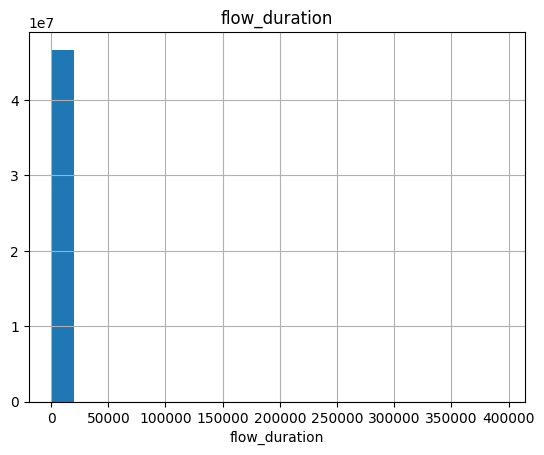

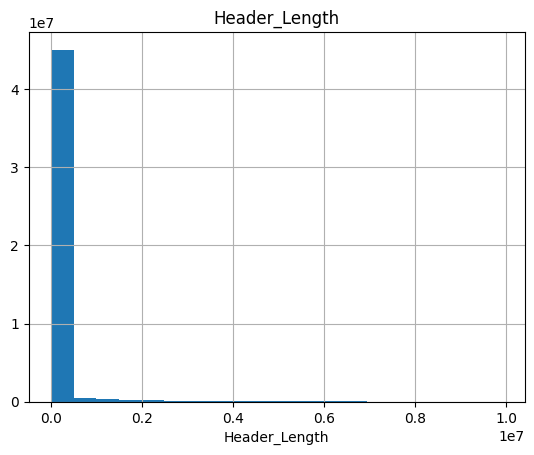

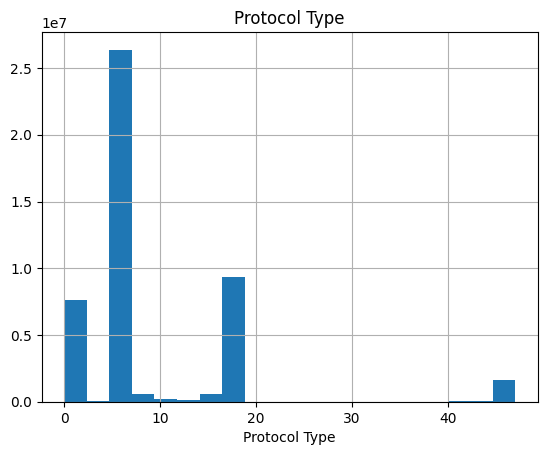

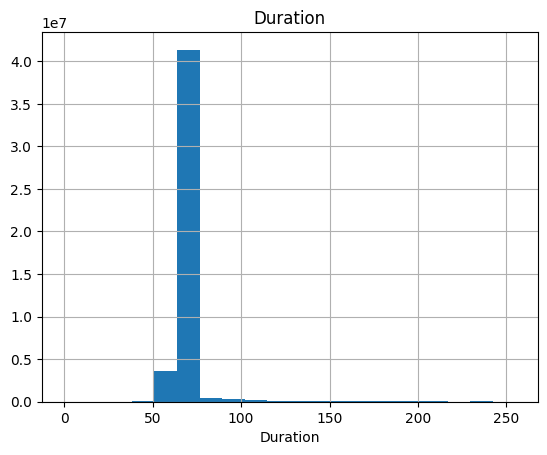

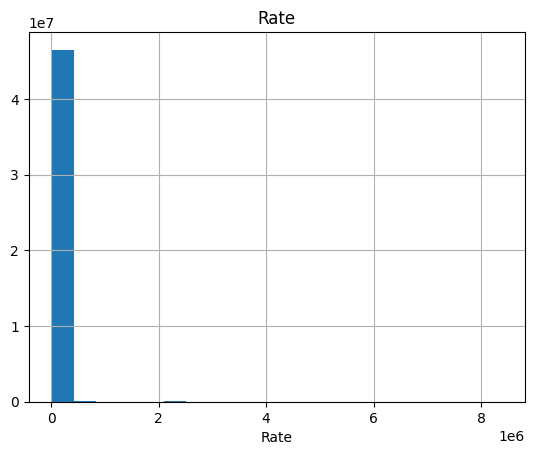

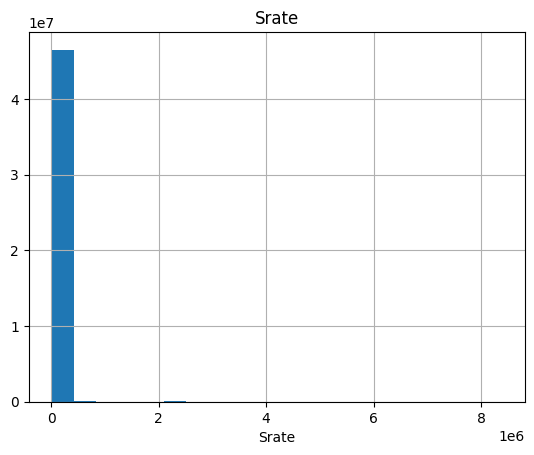

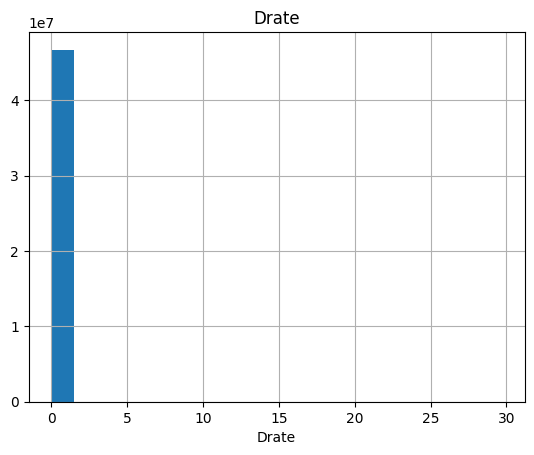

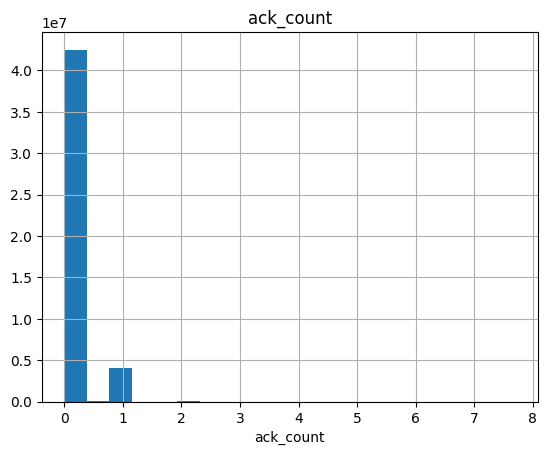

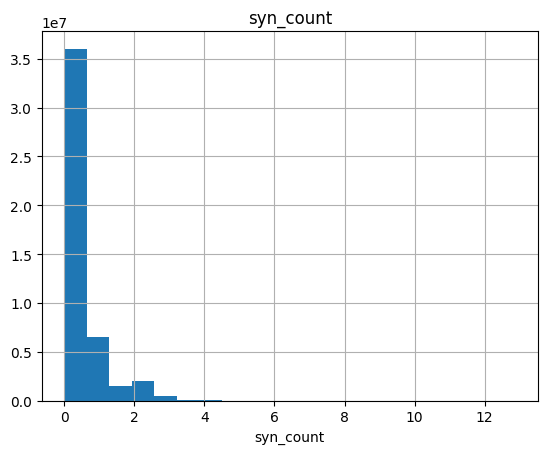

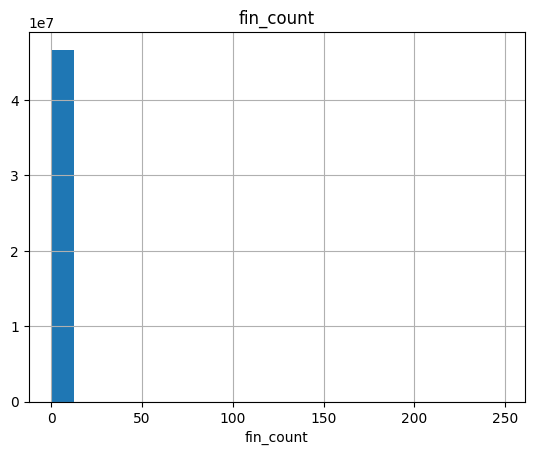

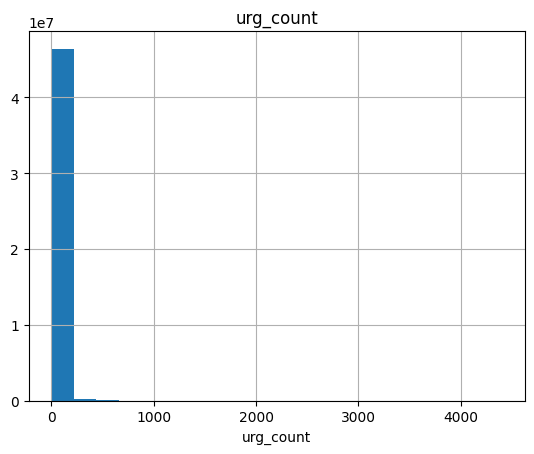

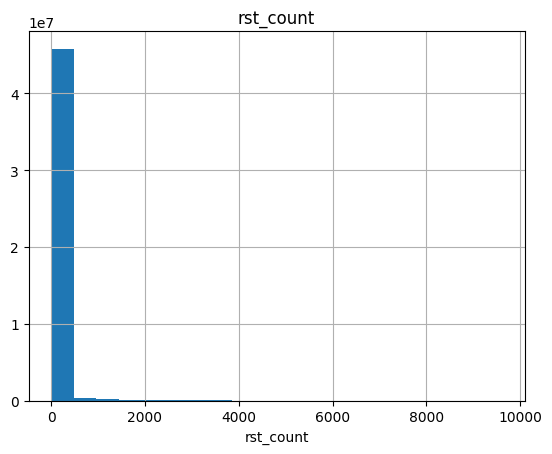

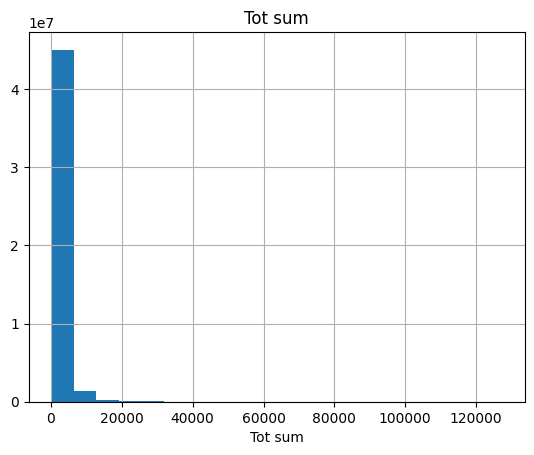

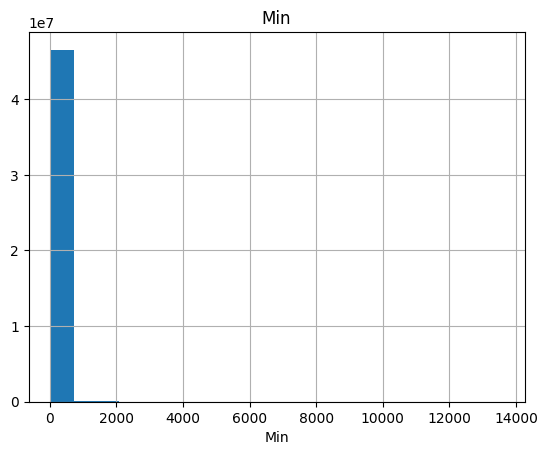

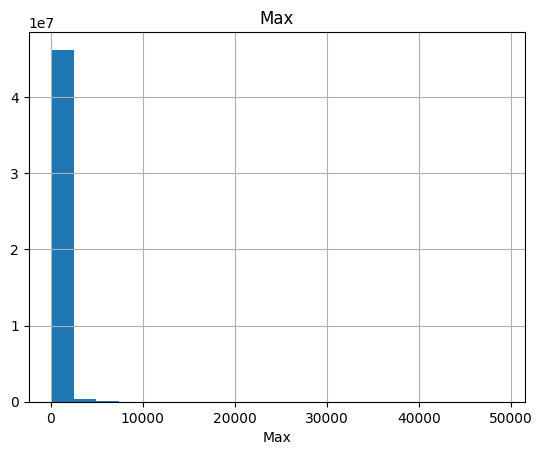

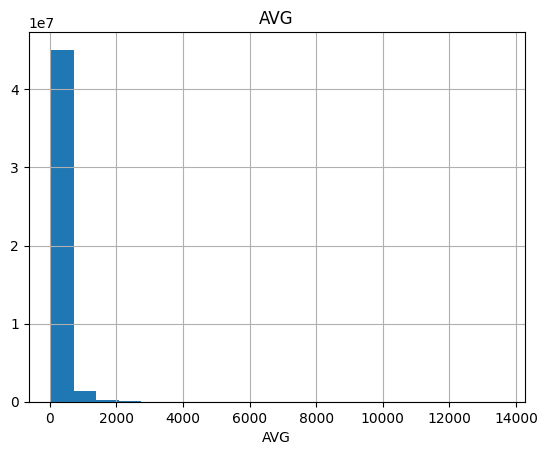

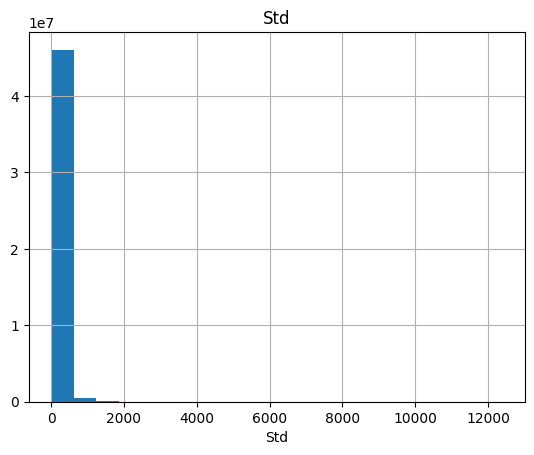

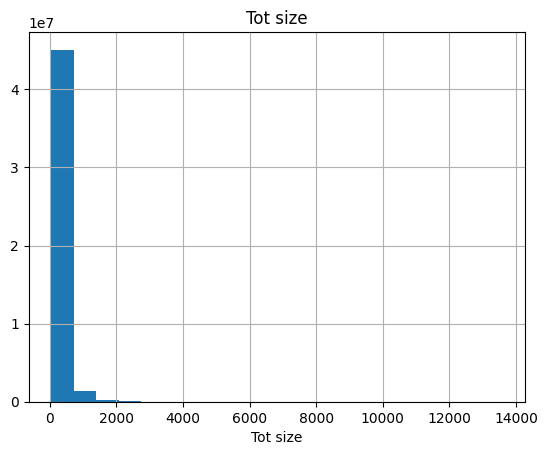

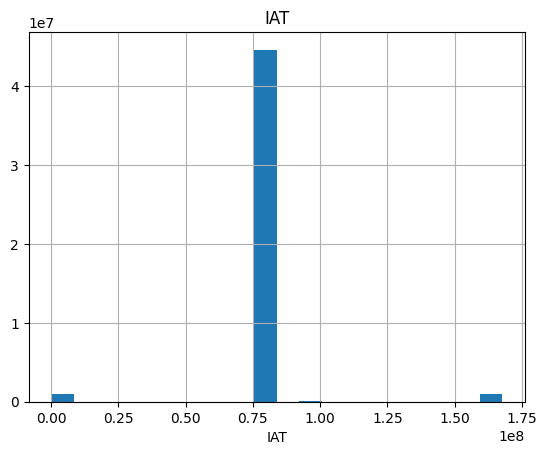

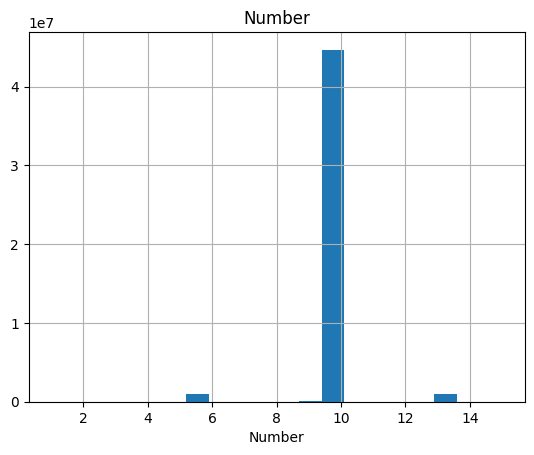

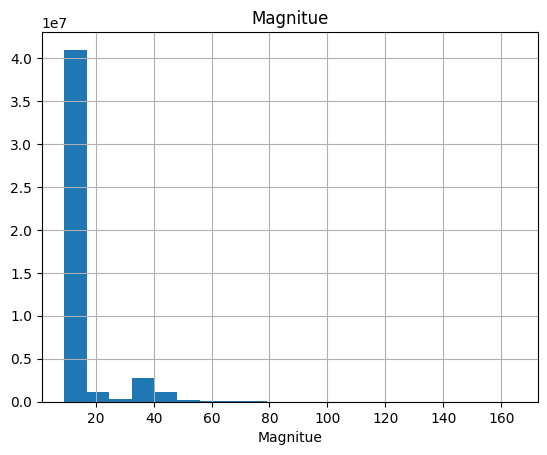

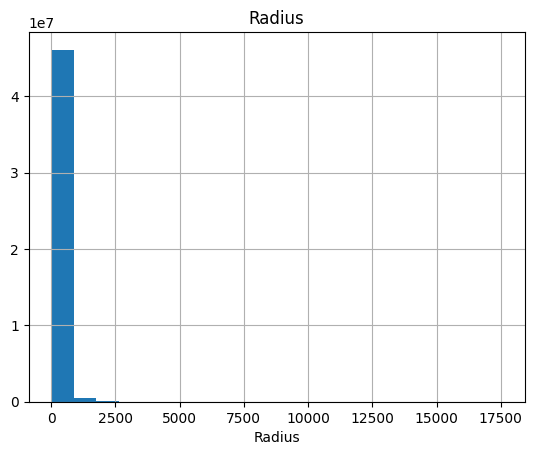

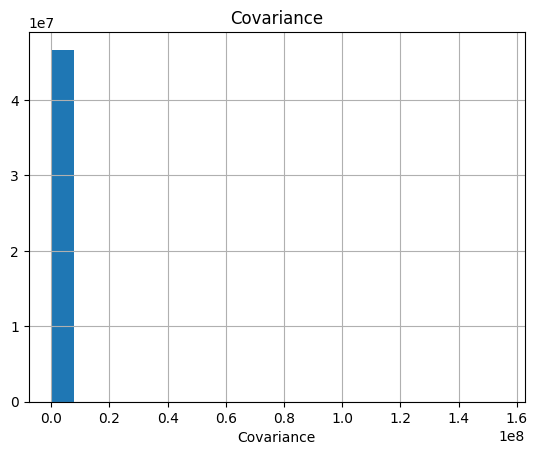

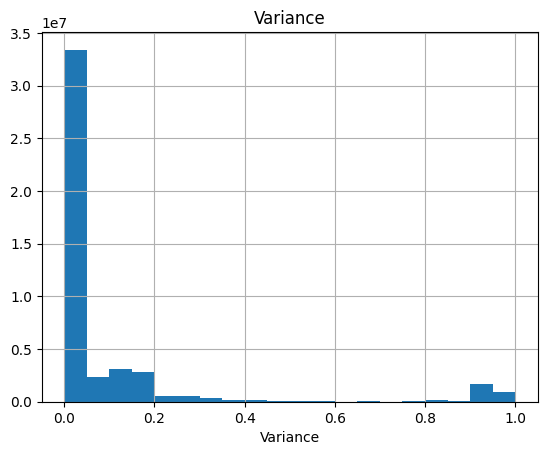

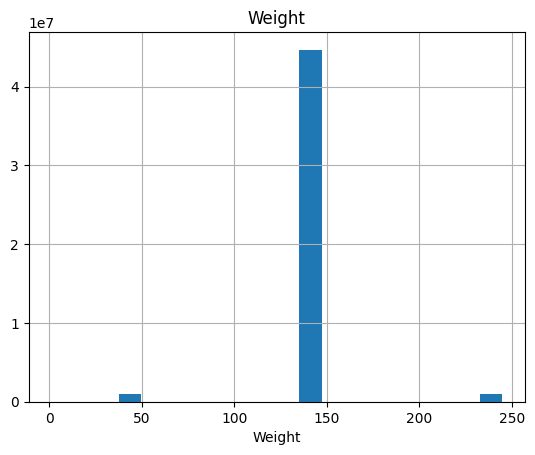

In [80]:
hist_for_nums(df,cont_cols)


Boxplot

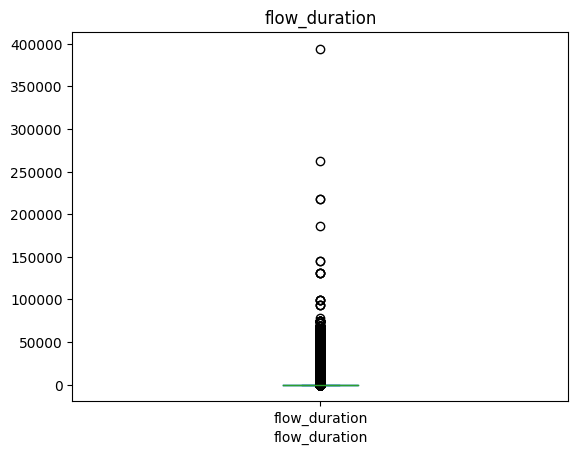

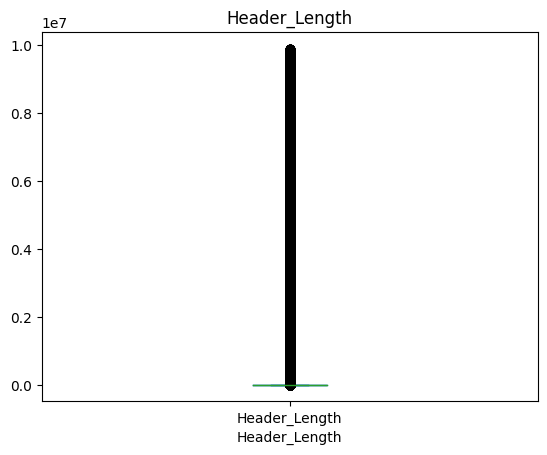

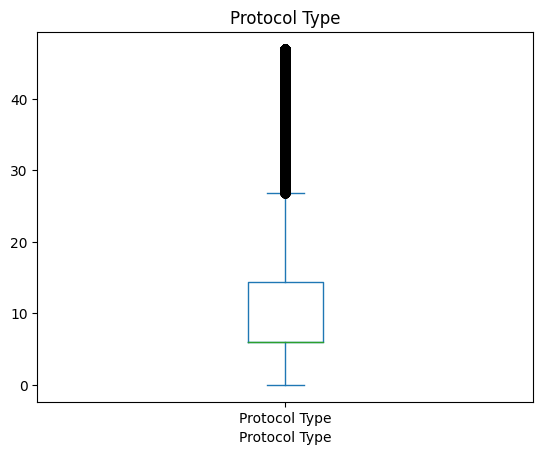

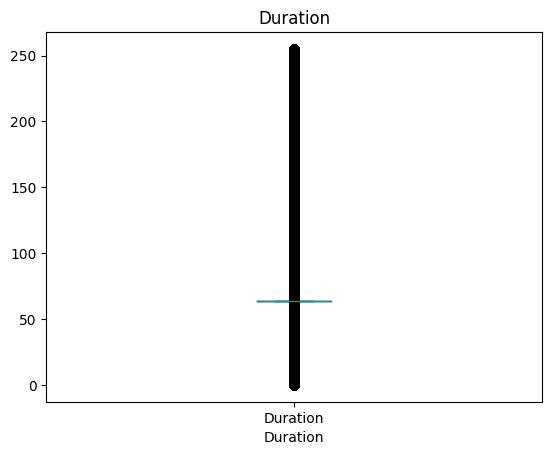

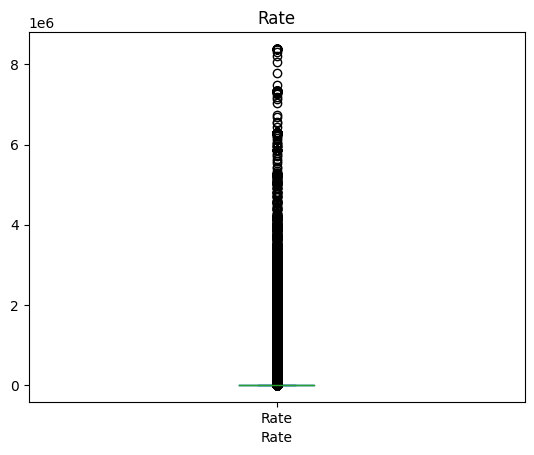

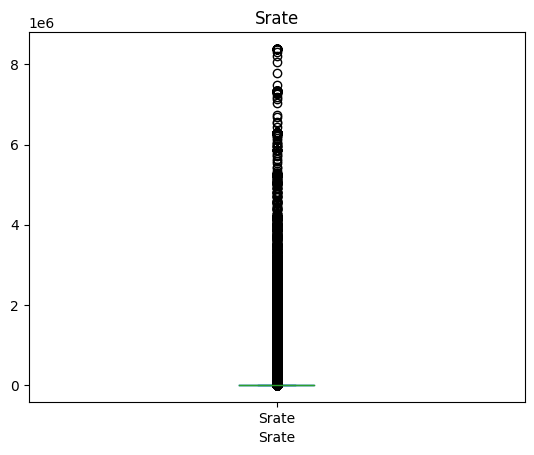

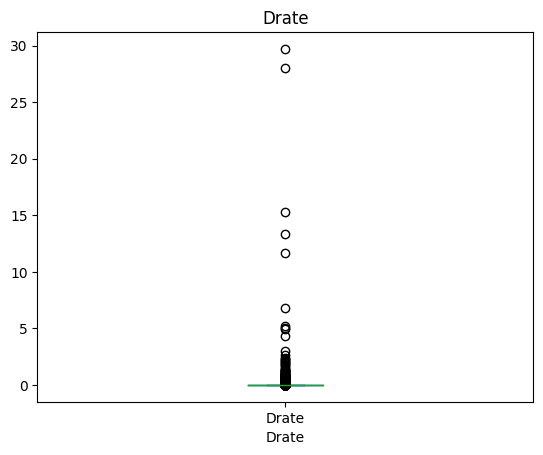

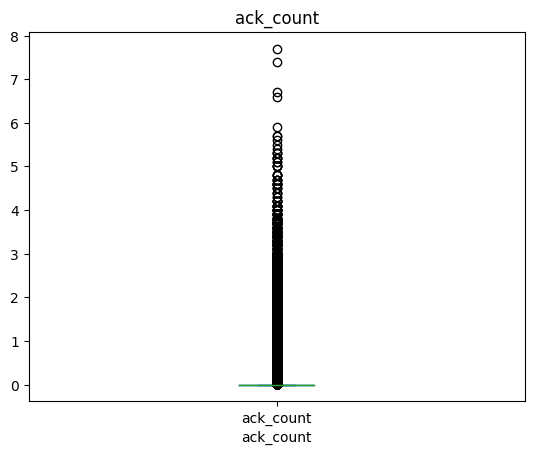

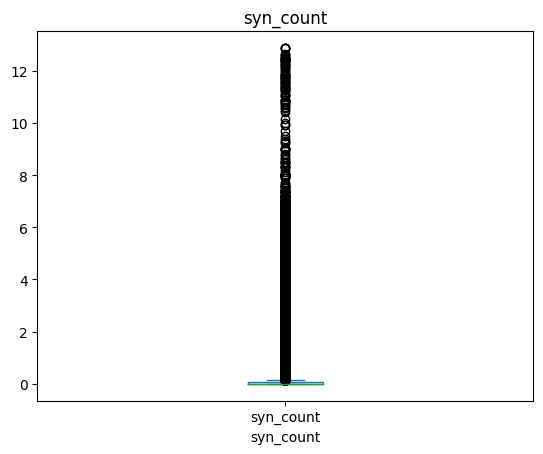

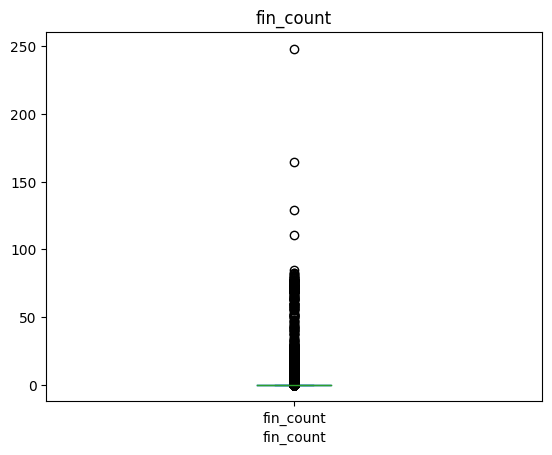

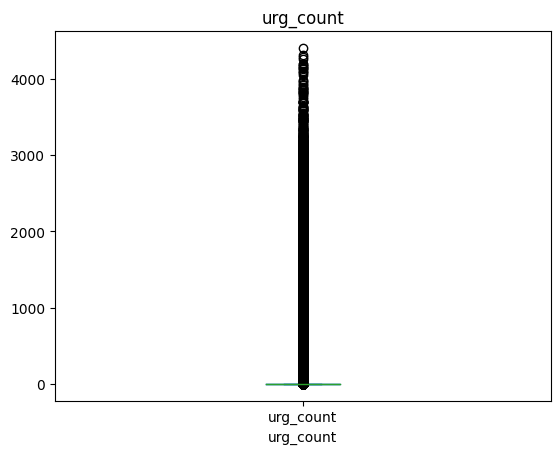

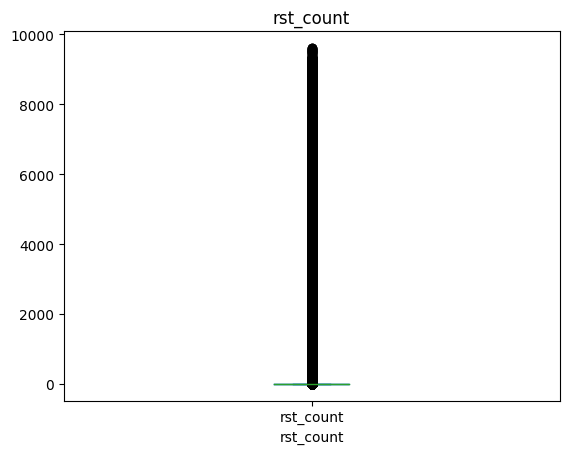

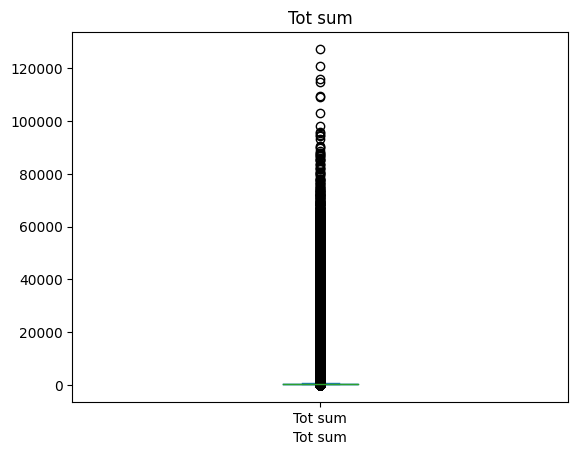

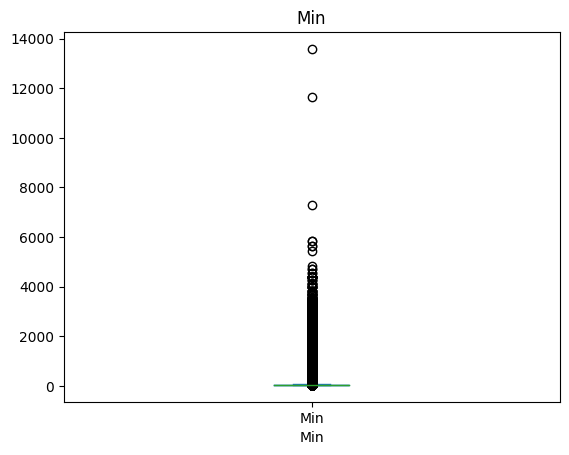

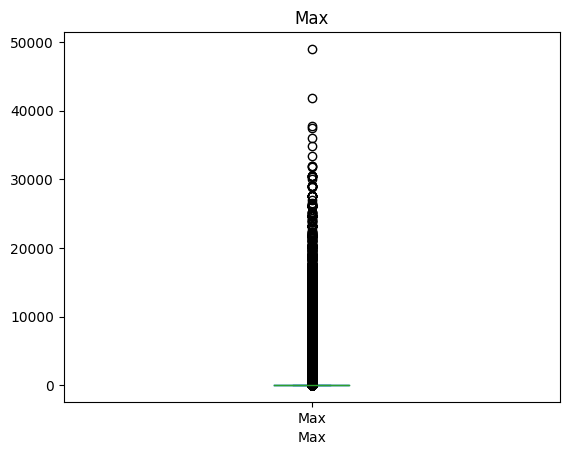

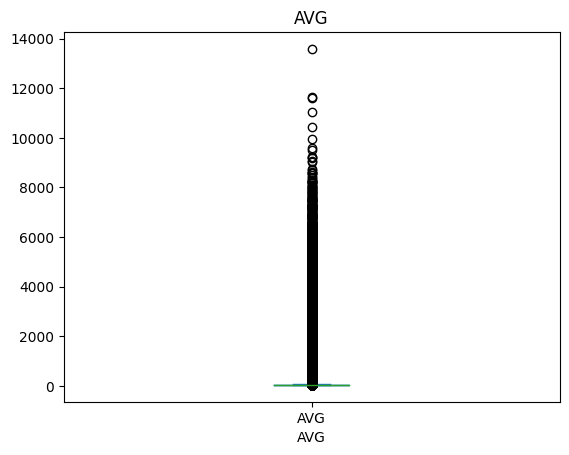

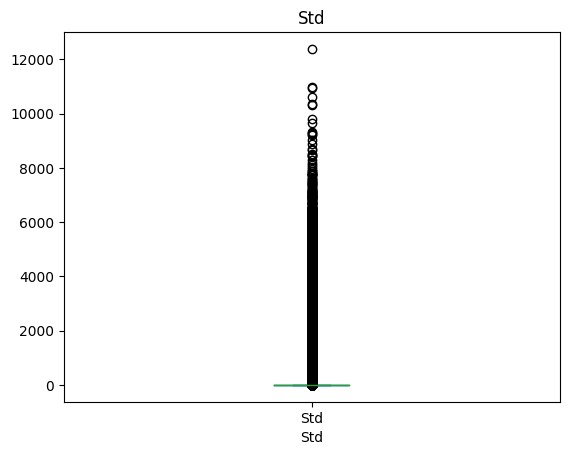

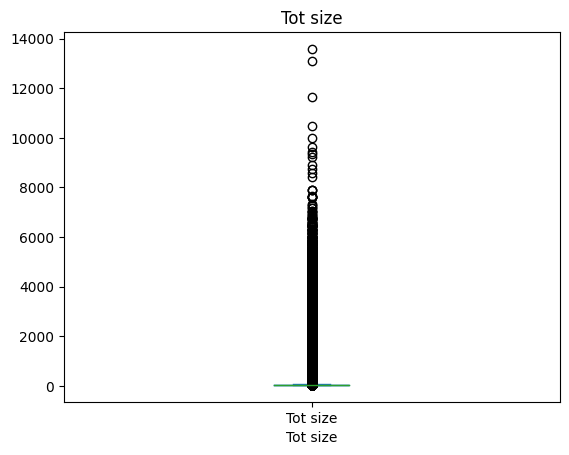

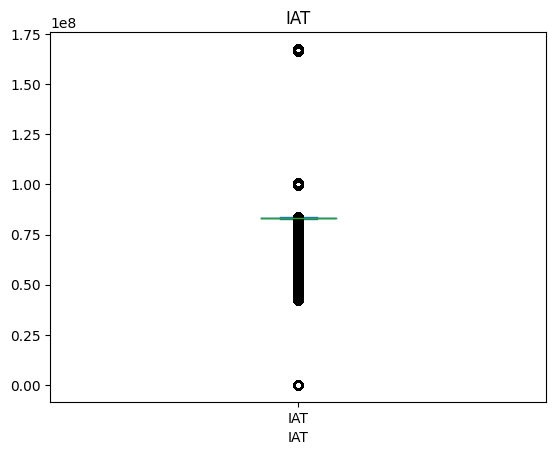

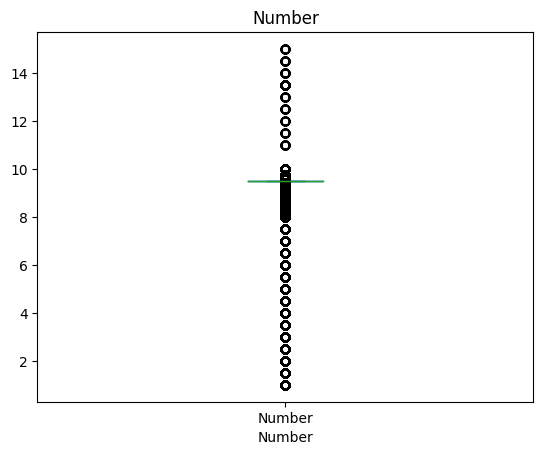

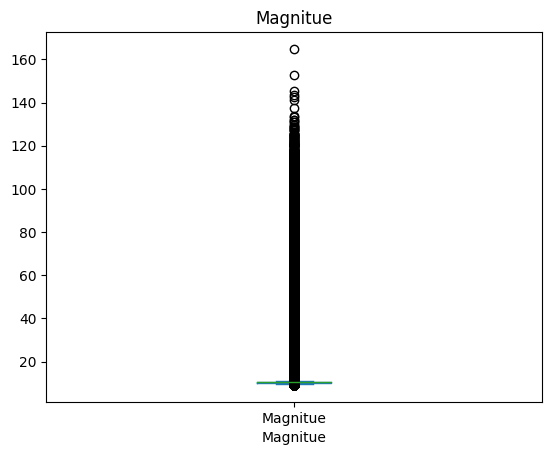

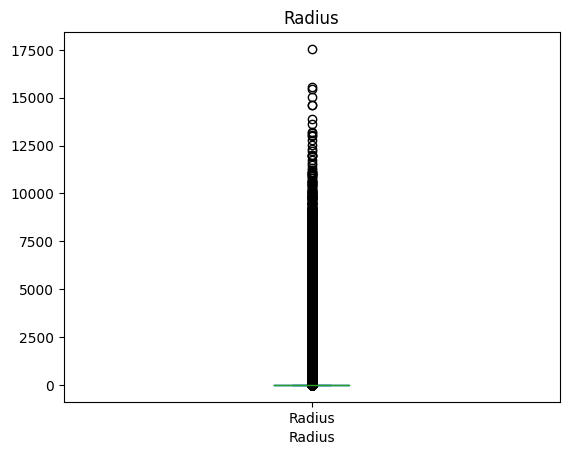

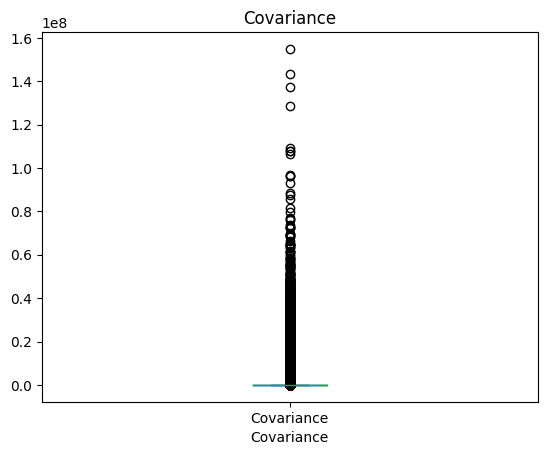

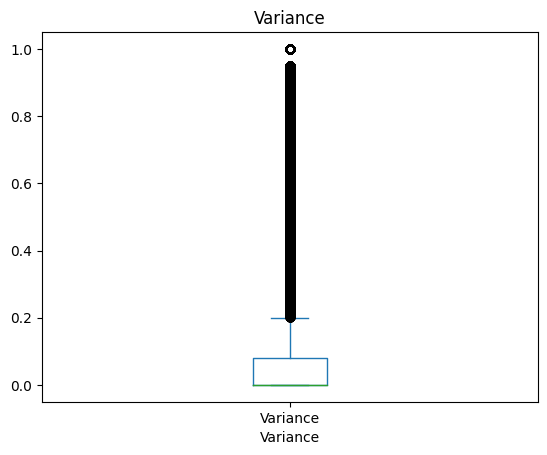

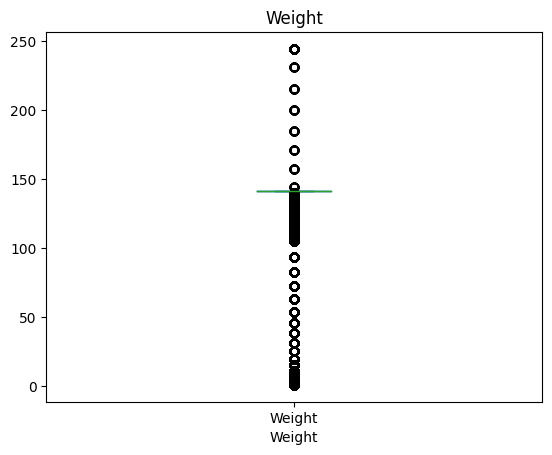

In [83]:
boxplot_for_nums(df, cont_cols)

In [ ]:
plt.close()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46686579 entries, 0 to 46686578
Data columns (total 47 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   flow_duration    int32 
 1   Header_Length    int32 
 2   Protocol Type    int32 
 3   Duration         int32 
 4   Rate             int32 
 5   Srate            int32 
 6   Drate            int32 
 7   fin_flag_number  int8  
 8   syn_flag_number  int8  
 9   rst_flag_number  int8  
 10  psh_flag_number  int8  
 11  ack_flag_number  int8  
 12  ece_flag_number  int8  
 13  cwr_flag_number  int8  
 14  ack_count        int32 
 15  syn_count        int32 
 16  fin_count        int32 
 17  urg_count        int32 
 18  rst_count        int32 
 19  HTTP             int8  
 20  HTTPS            int8  
 21  DNS              int8  
 22  Telnet           int8  
 23  SMTP             int8  
 24  SSH              int8  
 25  IRC              int8  
 26  TCP              int8  
 27  UDP              int8  
 28  DHCP      

#Matriz de Dispersão


In [ ]:
#pandas.plotting.scatter_matrix(df.loc[:, "flow_duration":"LLC"], diagonal="kde",figsize=(20,15))
#plt.show()

#Data Classes

In [86]:
composition = df['label'].value_counts()

In [88]:
composition

label
DDoS-ICMP_Flood            7200504
DDoS-UDP_Flood             5412287
DDoS-TCP_Flood             4497667
DDoS-PSHACK_Flood          4094755
DDoS-SYN_Flood             4059190
DDoS-RSTFINFlood           4045285
DDoS-SynonymousIP_Flood    3598138
DoS-UDP_Flood              3318595
DoS-TCP_Flood              2671445
DoS-SYN_Flood              2028834
BenignTraffic              1098195
Mirai-greeth_flood          991866
Mirai-udpplain              890576
Mirai-greip_flood           751682
DDoS-ICMP_Fragmentation     452489
MITM-ArpSpoofing            307593
DDoS-UDP_Fragmentation      286925
DDoS-ACK_Fragmentation      285104
DNS_Spoofing                178911
Recon-HostDiscovery         134378
Recon-OSScan                 98259
Recon-PortScan               82284
DoS-HTTP_Flood               71864
VulnerabilityScan            37382
DDoS-HTTP_Flood              28790
DDoS-SlowLoris               23426
DictionaryBruteForce         13064
BrowserHijacking              5859
CommandInjecti

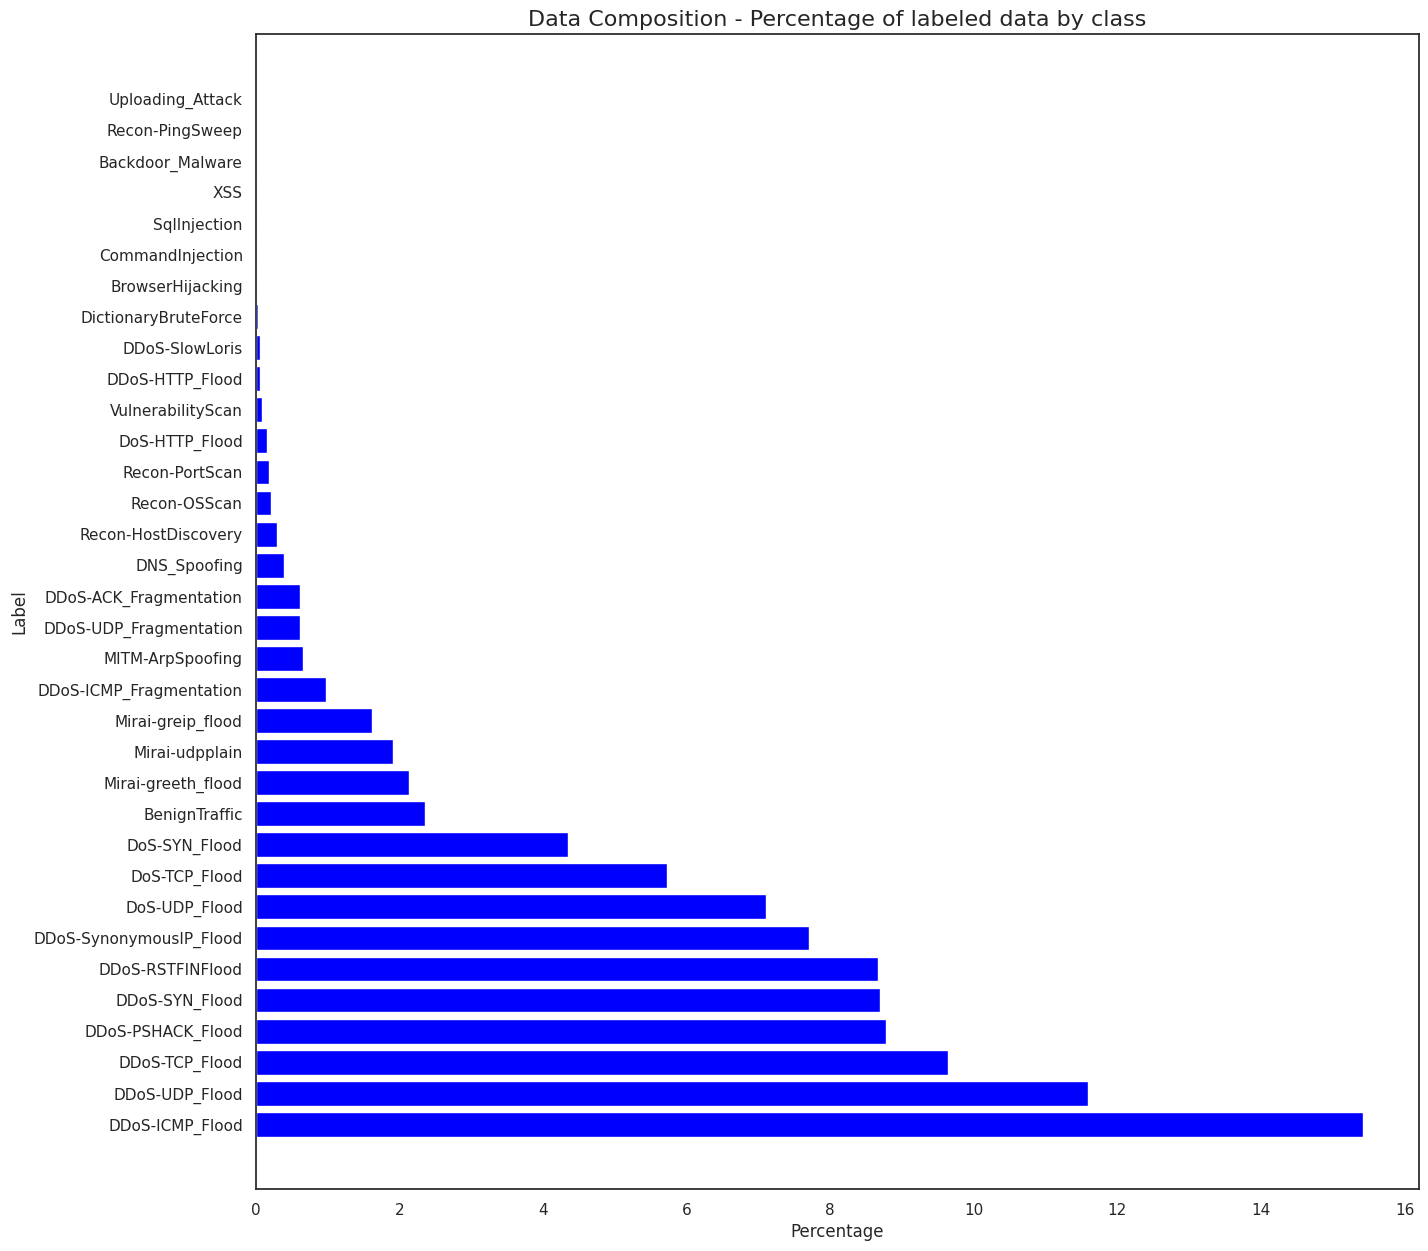

In [ ]:
import matplotlib.pyplot as plt
def barh_plot(df, column_name = "label"):
  labels = df[column_name].value_counts().index.to_list()
  composition = df[column_name].value_counts(normalize=True) * 100
  fig, ax = plt.subplots(figsize=(7, 15))
  ax.barh(labels, composition, color='blue')
  ax.set_xlabel('Percentage', fontsize=12)
  ax.set_ylabel('Label', fontsize=12)
  ax.set_title('Data Composition - Percentage of labeled data by class', fontsize=16)

  plt.show()


#Seleção de variáveis





In [8]:
X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count',
       'syn_count', 'fin_count', 'urg_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
       'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       ]

#dependent variables /calculated
X_columns_calc = ['Tot sum', 'Min',
       'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
       'Radius', 'Covariance', 'Variance', 'Weight',]

In [13]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

#Base de treino

In [9]:
X = df[X_columns]
Y = df['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2)
gc.collect()

#Random Forest Model

In [ ]:
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(X_train, Y_train)
y_pred = RFC.predict(X_test)

#Decision Tree Classifier Model

In [ ]:
DT = DecisionTreeClassifier()
start = time.time()
DT.fit(X_train, Y_train)

print('Prediction:')
y_pred = DT.predict(X_test)
print(y_pred)

print('Score:')
score = DT.score(X_test,Y_test)

end = time.time()
print('Tempo de execução: ')
print(end - start, 'seconds')

program start...



In [ ]:
print(classification_report(Y_test, y_pred))

Classifiction Report :
                         precision    recall  f1-score   support

       Backdoor_Malware       0.11      0.10      0.11       658
          BenignTraffic       0.87      0.86      0.86    219431
       BrowserHijacking       0.29      0.27      0.28      1234
       CommandInjection       0.23      0.24      0.23      1082
 DDoS-ACK_Fragmentation       0.97      0.97      0.97     56912
        DDoS-HTTP_Flood       0.74      0.76      0.75      5726
        DDoS-ICMP_Flood       0.97      0.98      0.98   1439569
DDoS-ICMP_Fragmentation       0.64      0.59      0.62     90058
      DDoS-PSHACK_Flood       1.00      1.00      1.00    818506
       DDoS-RSTFINFlood       1.00      1.00      1.00    810294
         DDoS-SYN_Flood       0.87      0.87      0.87    812769
         DDoS-SlowLoris       0.64      0.64      0.64      4605
DDoS-SynonymousIP_Flood       0.88      0.88      0.88    720501
         DDoS-TCP_Flood       0.92      0.94      0.93    899595
 